<a href="https://colab.research.google.com/github/sviteribuben/Pet_projects/blob/master/HACKOTHON_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HACKATHON OF MKB


## Necessary import and EDA and load data


In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import missingno as msno
from datetime import datetime, timedelta

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HACKATHON/data/train_dataset_hackathon_mkb.csv', sep=';', encoding='cp1251', parse_dates=['SIGN_DATE'])
print(f'Размер обучающей выборки: {train.shape}')
train.head()

Размер обучающей выборки: (17891, 124)


,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,...,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,1,1847,01JAN2018:00:00:00,0,0,1.298961e+09,2154000.0,1.125573e+09,NaN,150010000.0,NaN,21224000.0,1.048287e+10,105901000.0,127510000.0,9.477348e+09,440671000.0,3.312980e+08,138000.0,1.960896e+09,1.000700e+07,-46634000.0,599497000.0,500000.0,1.028878e+09,340135000.0,NaN,340135000.0,NaN,9.480796e+09,2.499973e+09,6.907960e+09,NaN,NaN,1.178183e+10,1.178183e+10,2.370882e+09,5.294104e+10,5.057016e+10,631752000.0,...,0.0,0.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,7.337400e+07,NaN,NaN,NaN,NaN,2.161000e+07,2378000.0,NaN,1.764200e+07,1000000.0,5.530000e+05,37000.0,9.073600e+07,1.000000e+05,NaN,6780000.0,NaN,8.385600e+07,NaN,NaN,NaN,NaN,4.248000e+06,NaN,4.171000e+06,77000.0,NaN,9.498400e+07,9.498400e+07,9.315000e+06,5.218400e+07,4.286900e+07,2569000.0,...,1.0,1.0,36.00.2,6.0,2762852.0,1.0,794.0,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4,12237,01JAN2018:00:00:00,0,0,1.937488e+09,122828000.0,6.103280e+08,NaN,809426000.0,356828000.0,38078000.0,5.786965e+09,12001000.0,71000.0,1.232486e+09,78603000.0,4.459193e+09,4611000.0,2.685905e+09,1.516514e+09,NaN,NaN,65834000.0,1.103557e+09,627253000.0,NaN,689000.0,626564000.0,4.411295e+09,3.930000e+05,3.092581e+09,NaN,NaN,7.724453e+09,7.724453e+09,1.694054e+10,4.028466e+10,2.334412e+10,931118000.0,...,1.0,1.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HACKATHON/data/test_dataset_hackathon_mkb.csv', sep=';', encoding='cp1251')
print(f'Размер тестовой выборки: {train.shape}')
train.head()

Размер тестовой выборки: (17891, 124)


,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,...,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,1,1847,01JAN2018:00:00:00,0,0,1.298961e+09,2154000.0,1.125573e+09,NaN,150010000.0,NaN,21224000.0,1.048287e+10,105901000.0,127510000.0,9.477348e+09,440671000.0,3.312980e+08,138000.0,1.960896e+09,1.000700e+07,-46634000.0,599497000.0,500000.0,1.028878e+09,340135000.0,NaN,340135000.0,NaN,9.480796e+09,2.499973e+09,6.907960e+09,NaN,NaN,1.178183e+10,1.178183e+10,2.370882e+09,5.294104e+10,5.057016e+10,631752000.0,...,0.0,0.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,7.337400e+07,NaN,NaN,NaN,NaN,2.161000e+07,2378000.0,NaN,1.764200e+07,1000000.0,5.530000e+05,37000.0,9.073600e+07,1.000000e+05,NaN,6780000.0,NaN,8.385600e+07,NaN,NaN,NaN,NaN,4.248000e+06,NaN,4.171000e+06,77000.0,NaN,9.498400e+07,9.498400e+07,9.315000e+06,5.218400e+07,4.286900e+07,2569000.0,...,1.0,1.0,36.00.2,6.0,2762852.0,1.0,794.0,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4,12237,01JAN2018:00:00:00,0,0,1.937488e+09,122828000.0,6.103280e+08,NaN,809426000.0,356828000.0,38078000.0,5.786965e+09,12001000.0,71000.0,1.232486e+09,78603000.0,4.459193e+09,4611000.0,2.685905e+09,1.516514e+09,NaN,NaN,65834000.0,1.103557e+09,627253000.0,NaN,689000.0,626564000.0,4.411295e+09,3.930000e+05,3.092581e+09,NaN,NaN,7.724453e+09,7.724453e+09,1.694054e+10,4.028466e+10,2.334412e+10,931118000.0,...,1.0,1.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


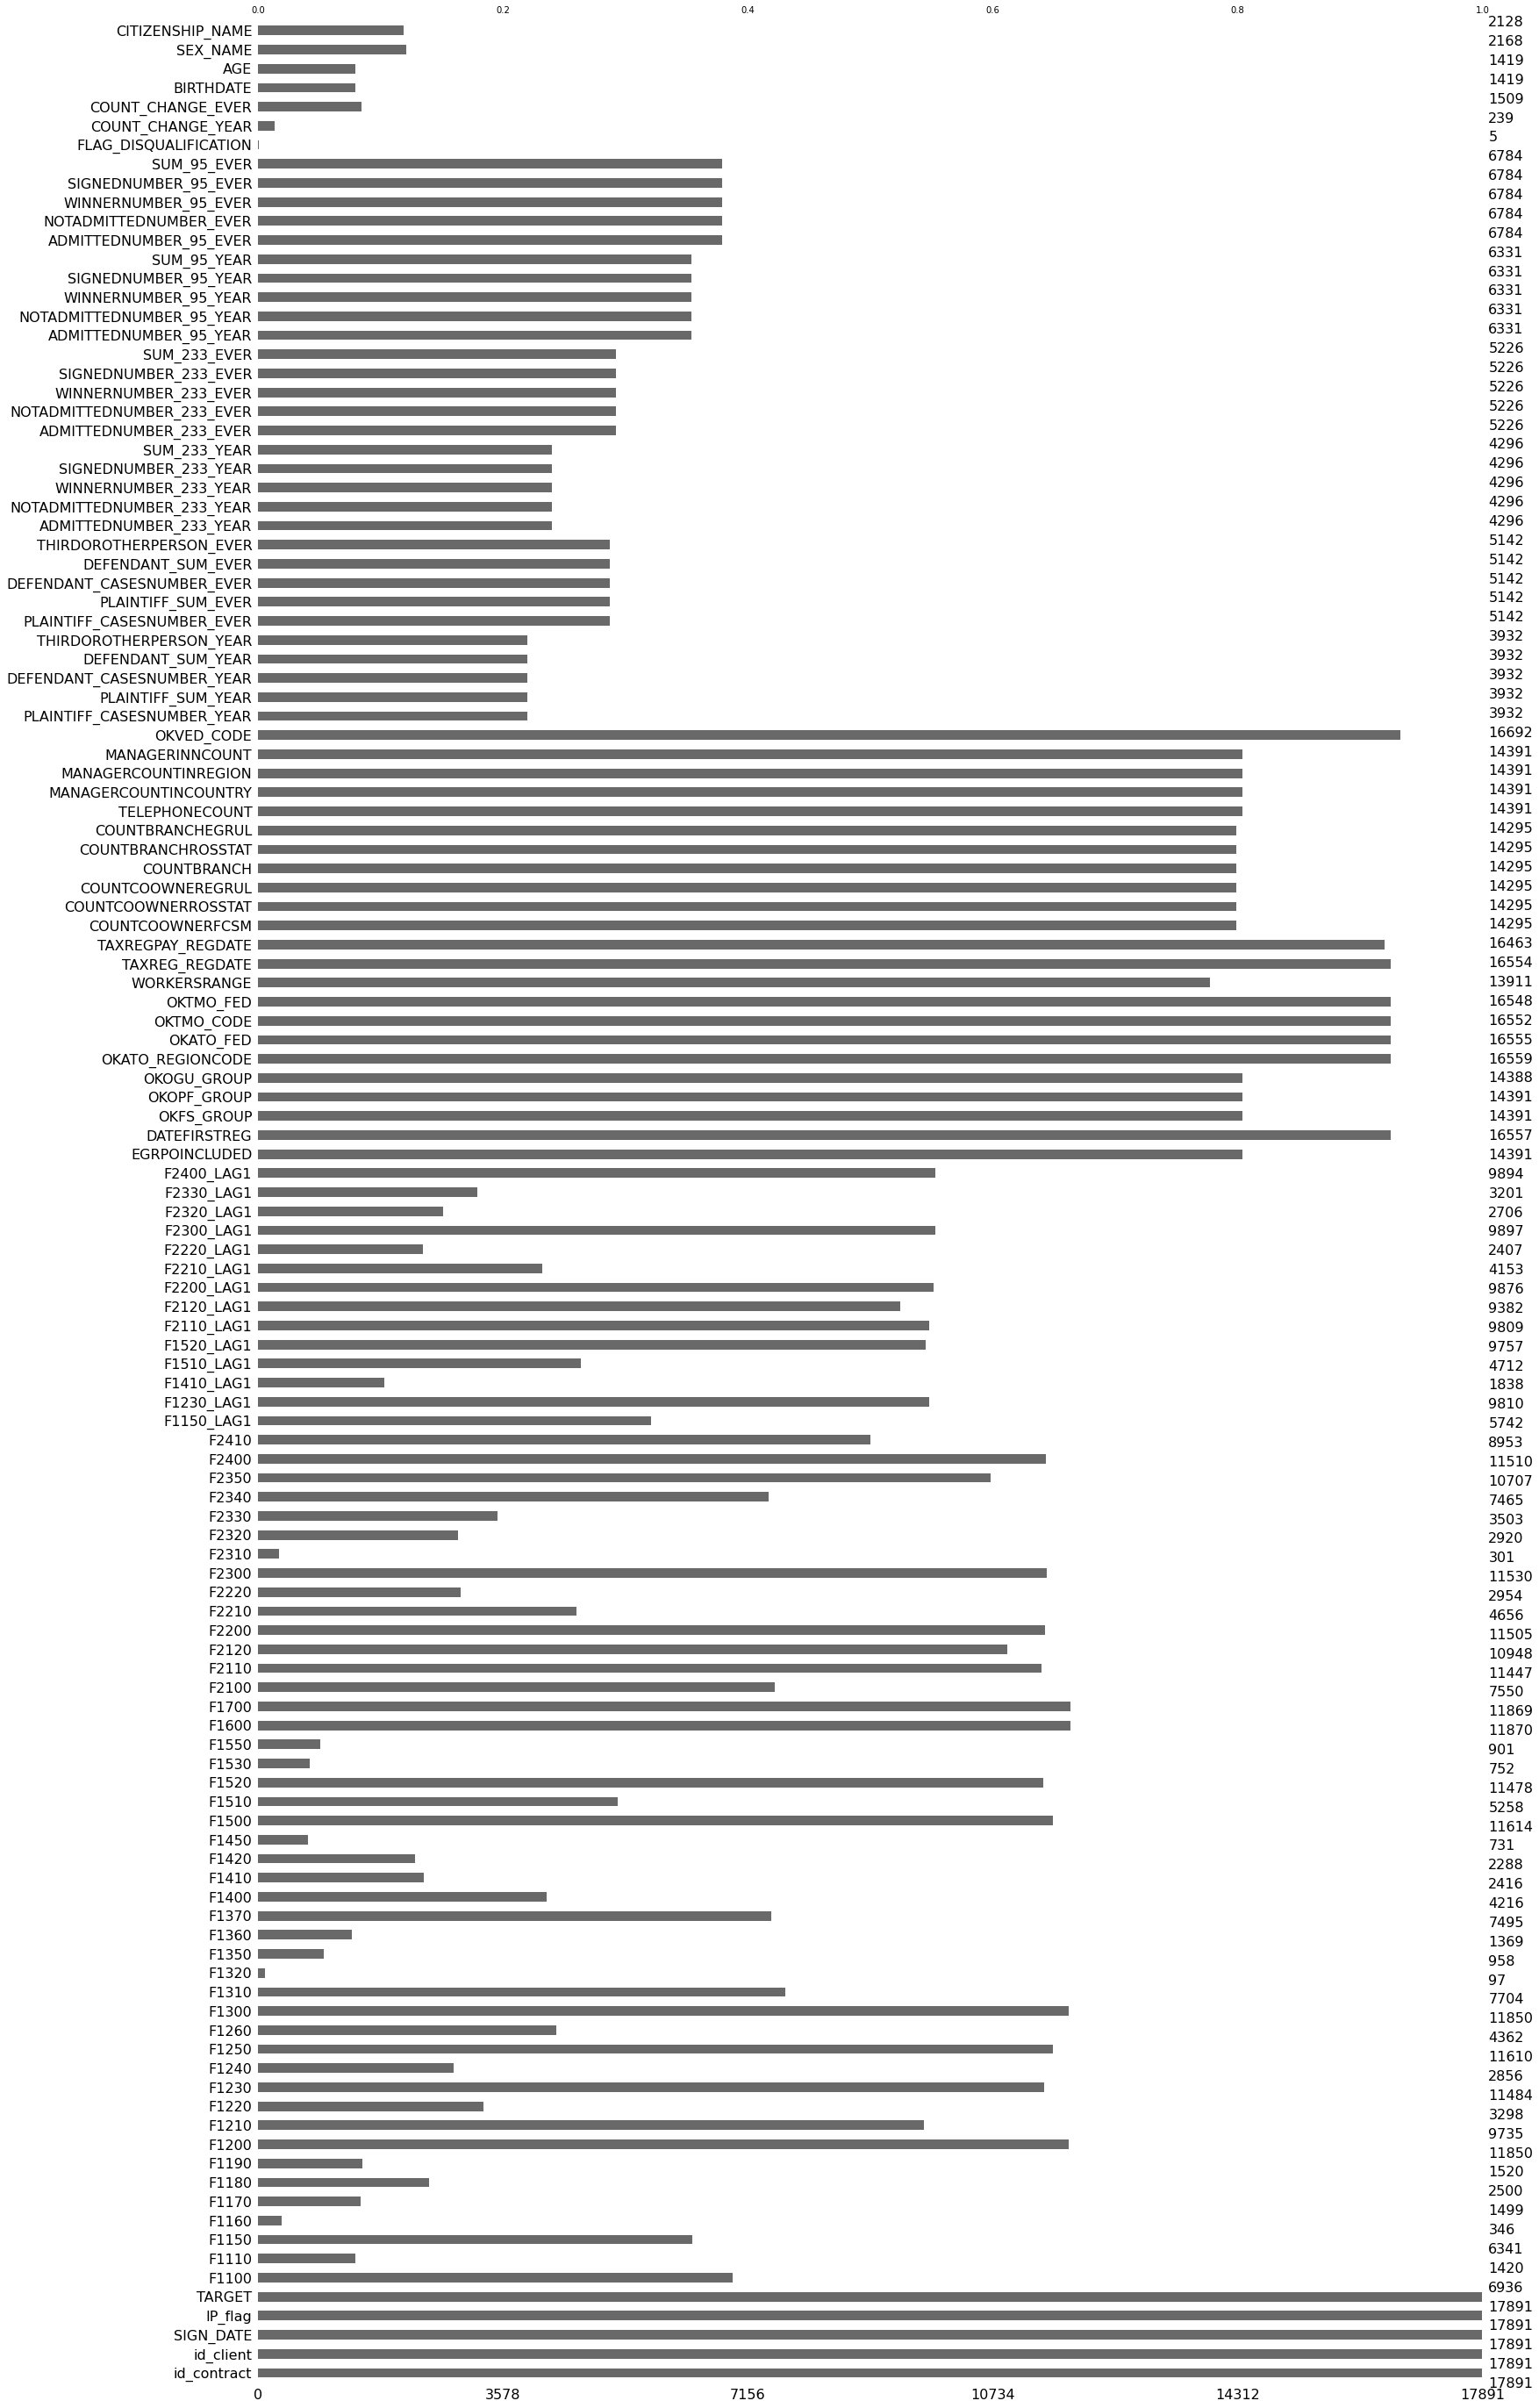

In [ ]:
# Check missing values
msno.bar(train);

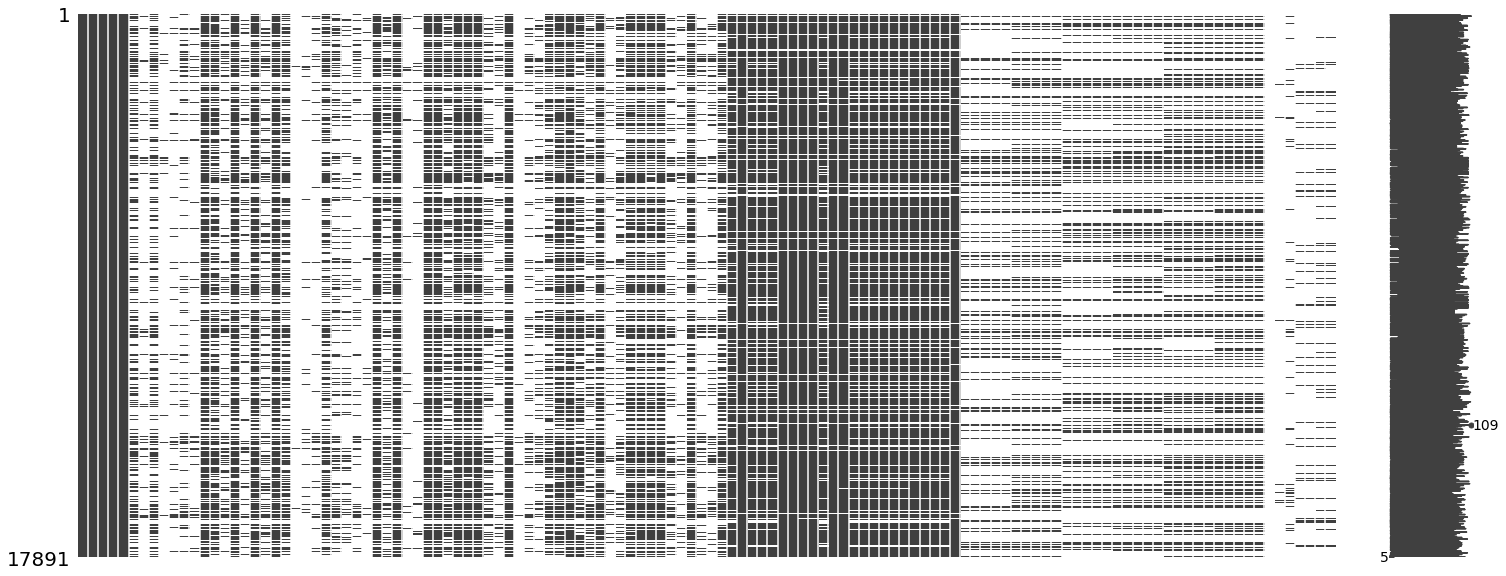

In [ ]:
msno.matrix(train)

In [ ]:
# percent of missing values

percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})\
.sort_values(by='percent_missing', ascending=True)
missing_value_df.tail(30)
# train.assign(percent_missing=missing_value_df)
# missing_value_df.shape

,percent_missing
F2330,80.420323
F1220,81.566151
F2330_LAG1,82.108323
F2220,83.488905
F2320,83.678945
F1240,84.036666
F2320_LAG1,84.875077
F1180,86.026494
F1410,86.496004
F2220_LAG1,86.546308


In [ ]:
train.describe(include=[np.number])

,id_contract,id_client,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,...,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,AGE
count,17891.000000,17891.000000,17891.000000,17891.000000,6.936000e+03,1.420000e+03,6.341000e+03,3.460000e+02,1.499000e+03,2.500000e+03,1.520000e+03,1.185000e+04,9.735000e+03,3.298000e+03,1.148400e+04,2.856000e+03,1.161000e+04,4.362000e+03,1.185000e+04,7.704000e+03,9.700000e+01,9.580000e+02,1.369000e+03,7.495000e+03,4.216000e+03,2.416000e+03,2.288000e+03,7.310000e+02,1.161400e+04,5.258000e+03,1.147800e+04,7.520000e+02,9.010000e+02,1.187000e+04,1.186900e+04,7.550000e+03,1.144700e+04,1.094800e+04,1.150500e+04,4.656000e+03,...,14295.000000,14295.000000,14391.000000,14391.000000,14391.000000,14391.000000,3932.000000,3.932000e+03,3932.000000,3.932000e+03,3932.000000,5142.000000,5.142000e+03,5142.000000,5.142000e+03,5142.000000,4296.000000,4296.000000,4296.000000,4296.000000,4.296000e+03,5226.000000,5226.000000,5226.000000,5226.000000,5.226000e+03,6331.000000,6331.000000,6331.000000,6331.000000,6.331000e+03,6784.000000,6784.000000,6784.000000,6784.000000,6.784000e+03,5.0,239.000000,1509.000000,1419.000000
mean,8946.000000,6630.652786,0.195629,0.413001,3.184582e+09,1.136357e+08,2.287078e+09,4.981780e+07,3.389027e+09,1.341100e+08,7.205449e+08,9.705362e+08,1.675900e+08,3.030103e+07,6.370344e+08,3.648272e+08,1.117474e+08,2.708175e+07,1.244926e+09,8.173558e+08,-2.728379e+07,3.076378e+09,6.120082e+07,4.503732e+08,1.813307e+09,2.537965e+09,3.166116e+08,6.447689e+08,9.642681e+08,5.587562e+08,6.496079e+08,2.068102e+08,1.157504e+08,2.829704e+09,2.830593e+09,1.350922e+09,3.430807e+09,2.653296e+09,1.915481e+08,1.571201e+09,...,0.813571,0.826093,2.929331,3.462025,1.572302,1.617122,5.481689,1.154723e+07,1.953713,2.727486e+06,0.393438,11.214508,1.671635e+07,4.152470,7.649295e+06,1.147219,48.636406,7.688547,22.940642,17.611965,5.293980e+07,124.973211,17.552430,51.907386,37.035209,2.291936e+08,255.501816,4.442584,142.752330,127.696888,1.112049e+08,651.184699,16.176739,354.557341,323.424823,2.544790e+08,1.0,1.502092,2.325381,41.916843
std,5164.831169,3659.132885,0.396695,0.492387,3.062184e+10,9.413832e+08,2.016291e+10,2.561433e+08,2.076766e+10,6.466805e+08,7.870709e+09,5.774517e+09,1.121621e+09,2.326690e+08,3.908750e+09,2.878130e+09,1.158987e+09,3.081231e+08,1.553552e+10,1.216041e+10,9.731885e+07,1.167619e+10,5.514648e+08,5.584579e+09,1.966787e+10,2.209961e+10,1.943034e+09,1.949567e+09,6.232429e+09,4.201817e+09,3.442707e+09,7.200261e+08,7.848721e+08,2.828261e+10,2.828386e+10,9.334109e+09,1.798909e+10,1.274571e+10,2.749605e+09,9.187262e+09,...,12.944128,5.882232,11.445375,8.640665,1.581787,1.887716,19.443358,5.877521e+07,8.249474,3.190453e+07,1.759110,40.786606,9.143443e+07,16.574626,7.776269e+07,4.524492,182.222939,29.039170,97.128814,64.595455,1.820845e+08,374.661611,57.563416,154.442595,102.460999,1.103887e+09,821.677011,12.892102,438.185253,414.939496,5.293399e+08,2552.512856,50.684059,1339.773863,1258.815709,1.140965e+09,0.0,1.511509,2.316937,10.769157
min,1.000000,1.000000,0.000000,0.0

In [ ]:
train.describe(include=[np.object])

,SIGN_DATE,DATEFIRSTREG,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,WORKERSRANGE,TAXREG_REGDATE,TAXREGPAY_REGDATE,OKVED_CODE,BIRTHDATE,SEX_NAME,CITIZENSHIP_NAME
count,17891,16557,14391,14391,14388,13911,16554,16463,16692,1419,2168,2128
unique,439,4227,5,5,4,12,3301,960,773,844,2,4
top,09JAN2019:00:00:00,25AUG2017:00:00:00,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,0 .. 5,25AUG2017:00:00:00,01JAN1960:00:00:00,46.46,05MAR1987:00:00:00,мужской,Российская Федерация
freq,198,294,12346,13169,13893,6183,294,14295,1725,125,1265,2124


In [ ]:
train.isnull().sum()

id_contract              0
id_client                0
SIGN_DATE                0
IP_flag                  0
TARGET                   0
                     ...  
COUNT_CHANGE_EVER    16382
BIRTHDATE            16472
AGE                  16472
SEX_NAME             15723
CITIZENSHIP_NAME     15763
Length: 124, dtype: int64

In [ ]:
test.isnull().sum()

id_contract             0
id_client               0
SIGN_DATE               0
IP_flag                 0
F1100                4840
                     ... 
COUNT_CHANGE_EVER    6843
BIRTHDATE            6715
AGE                  6715
SEX_NAME             5896
CITIZENSHIP_NAME     5899
Length: 123, dtype: int64

In [ ]:
# drop columns with highly percentage of missing values
# ====================================
mask_80 = (train.isnull().sum() * 100 / len(train))
mask_80 = mask_80[(mask_80 > 80)].index.to_list()
train_80 = train.drop(columns=mask_80)
# train_80.fillna(0)
train_80

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1150,F1200,F1210,F1230,F1250,F1260,F1300,F1310,F1370,F1400,F1500,F1510,F1520,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2300,F2340,F2350,F2400,F2410,F1150_LAG1,F1230_LAG1,F1510_LAG1,F1520_LAG1,F2110_LAG1,F2120_LAG1,F2200_LAG1,F2210_LAG1,F2300_LAG1,...,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER
0,1,1847,01JAN2018:00:00:00,0,0,1.298961e+09,1.125573e+09,1.048287e+10,105901000.0,9.477348e+09,3.312980e+08,138000.0,1.960896e+09,1.000700e+07,1.028878e+09,340135000.0,9.480796e+09,2.499973e+09,6.907960e+09,1.178183e+10,1.178183e+10,2.370882e+09,5.294104e+10,5.057016e+10,631752000.0,1.083075e+09,8.834700e+07,1.122418e+09,1.479338e+09,3.908700e+07,-19204000.0,1.031700e+09,9.179060e+09,2.112180e+09,7.426504e+09,4.955724e+10,4.648680e+10,5.565080e+08,1.424790e+09,2.401140e+08,...,1.0,0.0,8.0,7.0,7.0,3.0,0.0,0.0,0.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,7.337400e+07,2.161000e+07,2378000.0,1.764200e+07,5.530000e+05,37000.0,9.073600e+07,1.000000e+05,8.385600e+07,NaN,4.248000e+06,NaN,4.171000e+06,9.498400e+07,9.498400e+07,9.315000e+06,5.218400e+07,4.286900e+07,2569000.0,NaN,1.190000e+06,6.500000e+04,1.494000e+06,6.550000e+05,NaN,7.067400e+07,1.825700e+07,NaN,3.764000e+06,5.134000e+07,4.299900e+07,3.249000e+06,NaN,1.265000e+06,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,36.00.2,6.0,2762852.0,1.0,794.0,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0
3,4,12237,01JAN2018:00:00:00,0,0,1.937488e+09,6.103280e+08,5.786965e+09,12001000.0,1.232486e+09,4.459193e+09,4611000.0,2.685905e+09,1.516514e+09,1.103557e+09,627253000.0,4.411295e+09,3.930000e+05,3.092581e+09,7.724453e+09,7.724453e+09,1.694054e+10,4.028466e+10,2.334412e+10,931118000.0,1.600942e+10,1.489204e+09,1.283591e+09,1.335281e+09,1.102019e+09,256172000.0,5.929800e+08,1.398821e+09,2.780000e+05,3.987467e+09,3.873078e+10,2.170760e+10,1.032720e+09,1.599046e+10,1.525138e+09,...,1.0,1.0,0.0,0.0,2.0,8.0,1.0,1.0,1.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imput_KNN = KNNImputer(n_neighbors=2)
train_pre_01 = imput_KNN.fit_transform(train_80.select_dtypes(include=[np.number]))

In [ ]:
train_80.fillna(0, inplace=True)

In [ ]:
train_80.isnull().sum()

id_contract               0
id_client                 0
SIGN_DATE                 0
IP_flag                   0
TARGET                    0
                         ..
ADMITTEDNUMBER_95_EVER    0
NOTADMITTEDNUMBER_EVER    0
WINNERNUMBER_95_EVER      0
SIGNEDNUMBER_95_EVER      0
SUM_95_EVER               0
Length: 94, dtype: int64

In [ ]:
# detecting pairwise correlation

corr = train_80.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
!pip install pingouin==0.5.0


In [ ]:
import pingouin as pg
pg.pairwise_corr(train_80, method='spearman', alternative='greater', padjust='bonf').round(3)

In [ ]:
# import statsmodels.api as sm

# corr = train_80.corr()
# sm.graphics.plot_corr(corr, xnames=list(corr.columns))
# plt.figure(figsize=(20,10))
# plt.show();

In [ ]:
# select the best subset of features
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

In [ ]:
X = train_80.drop('TARGET', axis='columns').select_dtypes(include=[np.number])
y = train_80.TARGET
print(X)

       id_contract  id_client  ...  SIGNEDNUMBER_95_EVER  SUM_95_EVER
0                1       1847  ...                   NaN          NaN
1                2       4650  ...                   NaN          NaN
2                3       4770  ...                 168.0   18351739.0
3                4      12237  ...                   NaN          NaN
4                5       9988  ...                   NaN          NaN
...            ...        ...  ...                   ...          ...
17886        17887       3439  ...                 381.0   45954226.0
17887        17888        838  ...                 184.0  134417510.0
17888        17889      10537  ...                   NaN          NaN
17889        17890       1751  ...                   NaN          NaN
17890        17891       3095  ...                 271.0   55854817.0

[17891 rows x 84 columns]


In [ ]:
vect = CountVectorizer()
clf = LogisticRegression()

In [ ]:
selection = SelectPercentile(chi2, percentile=50)

In [ ]:
pipe = make_pipeline(selection, clf)
cross_val_score(pipe, X, y, n_jobs=-1, scoring='roc_auc').mean()

nan